<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/ARIMA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos Híbridos para predição de Séries Temporais**

Modelos híbridos para predição de séries temporais combinam técnicas estatísticas tradicionais, como os modelos ARIMA e SARIMA, e métodos de aprendizado de máquina. A ideia por traz desses modelos é tirar proveito das capacidades de ambas abordagens, a dos modelos estatísticos em capturar padrões lineares e sazonais, e a dos modelos de aprendizado de máquina para lidar com padrões não lineares e complexos.

Os modelos de aprendizado de máquina empregados podem ser modelos de aprendizado clássico, como regressores RandomForest e SVM, mas o uso mais comum é o de modelos de aprendizado profundo, como redes profundas recorrentes (RNN) ou LSTM (long short-term memory) que naturalmente consideram valores defasados (atrasados) na predições.

<br>
<br>

Zhang, G. P. (2003). **Time series forecasting using a hybrid ARIMA and neural network model.** Neurocomputing, 50, 159–175. doi:10.1016/s0925-2312(01)00702-0

https://www.sciencedirect.com/science/article/abs/pii/S0925231201007020

# Abordagens

Existem várias abordagens para se combinar esse modelos, sendo as mais comuns:

1. Previsão em Série

> Aqui é feita a previsão de um dos modelos, digamos o ARIMA, e o segundo modelo, por exemplo uma LSTM, é empregado para refinar o resultado modelando a previsão dos resíduos. O mesmo pode ser aplicado sendo a LSTM o primeiro modelo, e o modelo ARIMA o segundo.

2. Combinação

> Nesta abordagem ambos os modelos são estimados separadamente e o resultado final é algum tipo de combinação das predições dos dois modelos, como uma média ponderada ou uma regressão. Um modelo ainda pode ser treinado para buscar a melhor forma de combinação dos modelos.

3. Engenharia de Features Híbrida

> Nesta abordagem pode-se, por exemplo, extrair features de um modelo, como sazonalidade ou tendência do modelo SARIMA (a decomposição da série), que serão empregadas como entradas adicionais do modelo LSTM.








# Exemplos

A seguir um pequeno exemplo com dados fictícios aplicando as técnicas de:

* Predição em Série, ARIMA+LSTM
* Combinação, ARIMA+LSTM

## Predição em Série, ARIMA+LSTM

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    """
    Calculate and print various error metrics between true and predicted values.

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    dict: A dictionary containing the calculated metrics.
    """
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    # Print metrics
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

    return metrics

# Example usage
# y_true = np.array([...])  # Replace with actual values
# y_pred = np.array([...])  # Replace with predicted values
# calculate_metrics(y_true, y_pred)


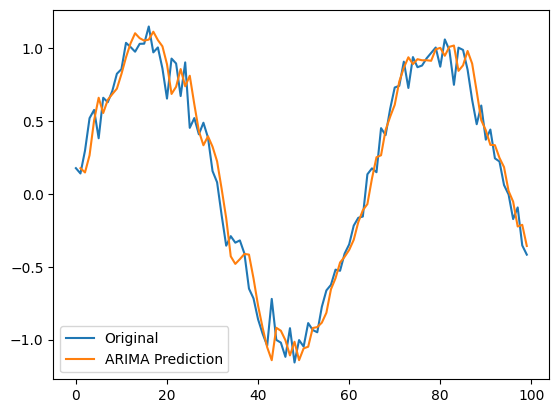

Arima Model Results
MSE: 0.0182
RMSE: 0.1349
MAPE: 33.1363
MAE: 0.1085
sMAPE: 28.1267
MAD: 0.6038
Epoch 1/20
89/89 - 4s - loss: 0.0475 - 4s/epoch - 40ms/step
Epoch 2/20
89/89 - 0s - loss: 0.0321 - 465ms/epoch - 5ms/step
Epoch 3/20
89/89 - 0s - loss: 0.0335 - 458ms/epoch - 5ms/step
Epoch 4/20
89/89 - 0s - loss: 0.0326 - 460ms/epoch - 5ms/step
Epoch 5/20
89/89 - 0s - loss: 0.0322 - 492ms/epoch - 6ms/step
Epoch 6/20
89/89 - 0s - loss: 0.0336 - 454ms/epoch - 5ms/step
Epoch 7/20
89/89 - 0s - loss: 0.0303 - 470ms/epoch - 5ms/step
Epoch 8/20
89/89 - 0s - loss: 0.0299 - 482ms/epoch - 5ms/step
Epoch 9/20
89/89 - 0s - loss: 0.0319 - 473ms/epoch - 5ms/step
Epoch 10/20
89/89 - 0s - loss: 0.0333 - 484ms/epoch - 5ms/step
Epoch 11/20
89/89 - 0s - loss: 0.0317 - 456ms/epoch - 5ms/step
Epoch 12/20
89/89 - 0s - loss: 0.0326 - 469ms/epoch - 5ms/step
Epoch 13/20
89/89 - 0s - loss: 0.0319 - 441ms/epoch - 5ms/step
Epoch 14/20
89/89 - 0s - loss: 0.0290 - 448ms/epoch - 5ms/step
Epoch 15/20
89/89 - 0s - loss: 

3/3 [==============================] - 1s 8ms/step


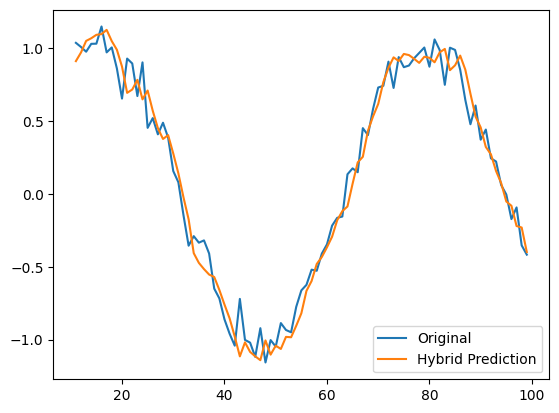

Hybrid Model Results
MSE: 0.0155
RMSE: 0.1246
MAPE: 34.9942
MAE: 0.1006
sMAPE: 24.8493
MAD: 0.6313


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Gerar dados de exemplo
np.random.seed(0)
data = np.sin(np.arange(100) * 0.1) + np.random.normal(0, 0.1, 100)
df = pd.DataFrame(data, columns=["value"])

# Ajustar o modelo ARIMA
arima_model = ARIMA(df['value'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.predict(start=1, end=len(df)-1, typ='levels')

# Plotar as previsões ARIMA
plt.plot(df['value'], label='Original')
plt.plot(arima_pred, label='ARIMA Prediction')
plt.legend()
plt.show()

print('Arima Model Results')
_ = calculate_metrics(df['value'][1::], arima_pred)

# Diferença entre os valores reais e os valores previstos pelo ARIMA
residuals = df['value'][1:] - arima_pred

# Escalonar os dados residuais
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Criar as sequências de dados para o LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
X = create_sequences(scaled_residuals, seq_length)
y = scaled_residuals[seq_length:]

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Construir o modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo LSTM
lstm_model.fit(X, y, epochs=20, batch_size=1, verbose=2)

# Fazer previsões com o LSTM
lstm_pred_scaled = lstm_model.predict(X)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# Combinar previsões ARIMA e LSTM
hybrid_pred = arima_pred[seq_length:] + lstm_pred.flatten()

# Plotar as previsões híbridas
plt.plot(df['value'][seq_length+1:], label='Original')
plt.plot(hybrid_pred, label='Hybrid Prediction')
plt.legend()
plt.show()

print('Hybrid Model Results')
_ = calculate_metrics(df['value'][seq_length+1:], hybrid_pred)


## Combinação, ARIMA+LSTM

Epoch 1/20
90/90 - 4s - loss: 0.0602 - 4s/epoch - 40ms/step
Epoch 2/20
90/90 - 0s - loss: 0.0385 - 471ms/epoch - 5ms/step
Epoch 3/20
90/90 - 0s - loss: 0.0243 - 493ms/epoch - 5ms/step
Epoch 4/20
90/90 - 0s - loss: 0.0184 - 454ms/epoch - 5ms/step
Epoch 5/20
90/90 - 0s - loss: 0.0117 - 452ms/epoch - 5ms/step
Epoch 6/20
90/90 - 0s - loss: 0.0081 - 464ms/epoch - 5ms/step
Epoch 7/20
90/90 - 0s - loss: 0.0074 - 452ms/epoch - 5ms/step
Epoch 8/20
90/90 - 0s - loss: 0.0047 - 483ms/epoch - 5ms/step
Epoch 9/20
90/90 - 1s - loss: 0.0042 - 544ms/epoch - 6ms/step
Epoch 10/20
90/90 - 1s - loss: 0.0037 - 679ms/epoch - 8ms/step
Epoch 11/20
90/90 - 1s - loss: 0.0039 - 670ms/epoch - 7ms/step
Epoch 12/20
90/90 - 1s - loss: 0.0040 - 731ms/epoch - 8ms/step
Epoch 13/20
90/90 - 1s - loss: 0.0034 - 696ms/epoch - 8ms/step
Epoch 14/20
90/90 - 1s - loss: 0.0041 - 658ms/epoch - 7ms/step
Epoch 15/20
90/90 - 0s - loss: 0.0045 - 459ms/epoch - 5ms/step
Epoch 16/20
90/90 - 0s - loss: 0.0038 - 483ms/epoch - 5ms/step
Epo

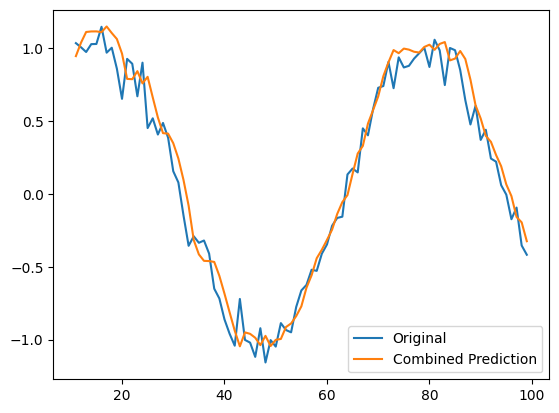

Hybrid Model Results
MSE: 0.0155
RMSE: 0.1246
MAPE: 34.9942
MAE: 0.1006
sMAPE: 24.8493
MAD: 0.6313


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Gerar dados de exemplo
np.random.seed(0)
data = np.sin(np.arange(100) * 0.1) + np.random.normal(0, 0.1, 100)
df = pd.DataFrame(data, columns=["value"])

# Ajustar o modelo ARIMA
arima_model = ARIMA(df['value'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.predict(start=1, end=len(df)-1, typ='levels')

# Escalonar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['value'].values.reshape(-1, 1))

# Criar as sequências de dados para o LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
X = create_sequences(scaled_data, seq_length)
y = scaled_data[seq_length:]

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Construir o modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo LSTM
lstm_model.fit(X, y, epochs=20, batch_size=1, verbose=2)

# Fazer previsões com o LSTM
lstm_pred_scaled = lstm_model.predict(X)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# Combinar previsões ARIMA e LSTM
combined_pred = 0.5 * arima_pred[seq_length:] + 0.5 * lstm_pred.flatten()[1::]

# Plotar as previsões combinadas
plt.plot(df['value'][seq_length+1:], label='Original')
plt.plot(combined_pred, label='Combined Prediction')
plt.legend()
plt.show()

print('Hybrid Model Results')
_ = calculate_metrics(df['value'][seq_length+1:], hybrid_pred)
